# Logistic Regression Exercises

- In these exercises, we'll continue working with the titanic dataset and building logistic regression models. Throughout this exercise, be sure you are training, evaluation, and comparing models on the train and validate datasets. The test dataset should only be used for your final model.

Create a new notebook, logistic_regression, use it to answer the following questions:

For all of the models you create, choose a threshold that optimizes for accuracy.

Create a model that includes only age, fare, and pclass. Does this model perform better than your baseline?

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from prepare import titanic_pipeline

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Found your sauce my bro
Found your sauce my bro
Found your sauce my bro


In [2]:
train, val, test = titanic_pipeline()
train.head()

Found your sauce my bro


,survived,pclass,age,sibsp,parch,fare,alone,sex_male,class_First,class_Second,class_Third,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
748,0,1,19.0,1,0,53.1000,0,1,1,0,0,0,0,1
45,0,3,29.0,0,0,8.0500,1,1,0,0,1,0,0,1
28,1,3,29.0,0,0,7.8792,1,0,0,0,1,0,1,0
633,0,1,29.0,0,0,0.0000,1,1,1,0,0,0,0,1
403,0,3,28.0,1,0,15.8500,0,1,0,0,1,0,0,1


In [3]:
def xy_split(df):
    
    return df.drop(columns = ['survived']), df.survived

In [4]:
X_train, y_train = xy_split(train)
X_val, y_val = xy_split(val)

X_train.head()

,pclass,age,sibsp,parch,fare,alone,sex_male,class_First,class_Second,class_Third,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
748,1,19.0,1,0,53.1000,0,1,1,0,0,0,0,1
45,3,29.0,0,0,8.0500,1,1,0,0,1,0,0,1
28,3,29.0,0,0,7.8792,1,0,0,0,1,0,1,0
633,1,29.0,0,0,0.0000,1,1,1,0,0,0,0,1
403,3,28.0,1,0,15.8500,0,1,0,0,1,0,0,1


In [5]:
def keep_cols(df):
    
    cols_to_keep = ['pclass', 'age', 'fare']
    return df[cols_to_keep], df.survived

In [6]:
X_train, y_train = keep_cols(train)
X_val, y_val = keep_cols(val)

X_train.head()

,pclass,age,fare
748,1,19.0,53.1000
45,3,29.0,8.0500
28,3,29.0,7.8792
633,1,29.0,0.0000
403,3,28.0,15.8500


In [7]:
y_train.mode()

0    0
Name: survived, dtype: int64

In [8]:
train.survived.value_counts(normalize=True)

0    0.616372
1    0.383628
Name: survived, dtype: float64

In [9]:
base_acc = (y_train == 0).mean()
round(base_acc, 2)

0.62

In [10]:
seed = 42

logit = LogisticRegression(random_state=seed)

logit.fit(X_train, y_train)

y_pred = logit.predict(X_train)
y_pred_proba = logit.predict_proba(X_train)


print("Baseline is", round(base_acc, 2))
print("Logistic Regression using age, pclass, and fare features")
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Baseline is 0.62
Logistic Regression using age, pclass, and fare features
Accuracy of Logistic Regression classifier on training set: 0.71


In [11]:
y_pred_proba = np.array([i[1] for i in y_pred_proba])

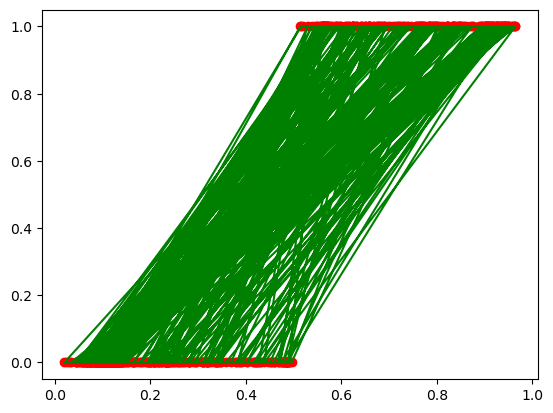

In [29]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# scatter plot where x is the probabilities and y is the class (0, 1)
ax.scatter(y_pred_proba, y_pred, color='red')
ax.plot(y_pred_proba, y_pred, color='green')
plt.show()

Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.

In [13]:
train, val, test = titanic_pipeline()

Found your sauce my bro


In [14]:
train.head(1)

,survived,pclass,age,sibsp,parch,fare,alone,sex_male,class_First,class_Second,class_Third,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
748,0,1,19.0,1,0,53.1,0,1,1,0,0,0,0,1


In [15]:
def xy_split(df):
    
    return df.drop(columns = ['survived']), df.survived

In [16]:
X_train, y_train = xy_split(train)
X_val, y_val = xy_split(val)

X_train.head()

,pclass,age,sibsp,parch,fare,alone,sex_male,class_First,class_Second,class_Third,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
748,1,19.0,1,0,53.1000,0,1,1,0,0,0,0,1
45,3,29.0,0,0,8.0500,1,1,0,0,1,0,0,1
28,3,29.0,0,0,7.8792,1,0,0,0,1,0,1,0
633,1,29.0,0,0,0.0000,1,1,1,0,0,0,0,1
403,3,28.0,1,0,15.8500,0,1,0,0,1,0,0,1


In [17]:
def keep_cols(df):
    
    cols_to_keep = ['pclass', 'age', 'fare', 'sex_male']
    return df[cols_to_keep], df.survived

In [18]:
X_train, y_train = keep_cols(train)
X_val, y_val = keep_cols(val)

X_train.head()

,pclass,age,fare,sex_male
748,1,19.0,53.1000,1
45,3,29.0,8.0500,1
28,3,29.0,7.8792,0
633,1,29.0,0.0000,1
403,3,28.0,15.8500,1


In [19]:
y_train.mode()

0    0
Name: survived, dtype: int64

In [20]:
base_acc = (y_train == 0).mean()
round(base_acc, 2)

0.62

In [21]:
seed = 42

logit = LogisticRegression(random_state=seed)

logit.fit(X_train, y_train)

y_pred = logit.predict(X_train)
y_pred_proba = logit.predict_proba(X_train)


print("Baseline is", round(base_acc, 2))
print("Logistic Regression using age, pclass, and fare features")
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Baseline is 0.62
Logistic Regression using age, pclass, and fare features
Accuracy of Logistic Regression classifier on training set: 0.80


In [23]:
y_pred_proba = np.array([i[1] for i in y_pred_proba])

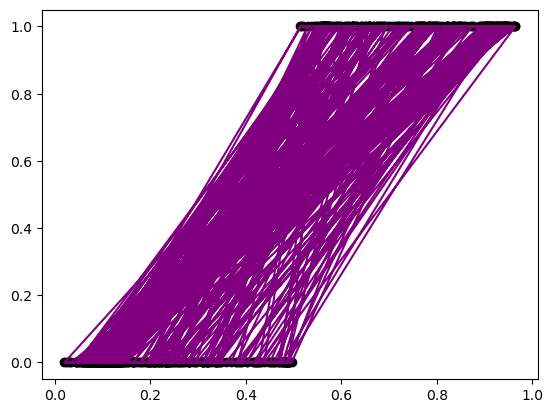

In [28]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# scatter plot where x is the probabilities and y is the class (0, 1)
ax.scatter(y_pred_proba, y_pred, color='black')
ax.plot(y_pred_proba, y_pred, color='purple')
plt.show()

Try out other combinations of features and models.

Use your best 3 models to predict and evaluate on your validate sample.

Choose you best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train?

# -------------------------------------------------------------

#### Bonus1 How do different strategies for handling the missing values in the age column affect model performance?

#### Bonus2: How do different strategies for encoding sex affect model performance?

#### Bonus3: scikit-learn's LogisticRegression classifier is actually applying a regularization penalty to the coefficients by default. This penalty causes the magnitude of the coefficients in the resulting model to be smaller than they otherwise would be. This value can be modified with the C hyper parameter. Small values of C correspond to a larger penalty, and large values of C correspond to a smaller penalty. Try out the following values for C and note how the coefficients and the model's performance on both the dataset it was trained on and on the validate split are affected.

C = .01, .1, 1, 10, 100, 1000

#### Bonus Bonus: how does scaling the data interact with your choice of C?